## Migration und Sozialstruktur
In diesem Programm werden Aggregatdaten aus dem Mikrozensus 2019 verwandt, um verschiedene "Migrationsgruppen" sozialräumlich darszustellen. 
Link zu den xlsx-Daten: https://www.statistischebibliothek.de/mir/receive/DEHeft_mods_00131402
Im folgenden wird zunächst die Struktur des Programms genauer erläutert.

In [40]:
#Import der verwandten Libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from adjustText import adjust_text

Beim Import stellt sich das Problem, dass die Label der Spalten recht komplex aufgebaut sind, daher wird der Datensatz erst ab der Zeile mit den Spaltennummern eingelesen (s. header); diese befinden sich jedoch je nach Datenblatt in verschiedenen Zeilen. 

In [41]:
#Tabellenblatt 16I: pers. Einkommen
t16=pd.read_excel('MZ_Migration 2019.xlsx', index_col=0, header=6, usecols=range(0,27), sheet_name='Tab16I')  
t16.columns=list(range(1,27))
t16=t16.replace(['/   ','–   '],['0','0'])
p_inc=t16.iloc[0:78,[0,25]]
p_inc=p_inc.apply(pd.to_numeric)

Alternativ zum Einlesen aus einer heruntergekadenen Datei, können die Datein auch direkt per https abgerufen werden.

import requests
url="https://www.statistischebibliothek.de/mir/servlets/MCRFileNodeServlet/DEHeft_derivate_00037332/2010220117005_korr13032017.xlsx"
s = requests.get(url).content
c = pd.read_excel(s,sheet_name='Tab16I')

In [42]:
#Tabellenblatt 8I: schulische Bildungsjahre
t8=pd.read_excel('MZ_Migration 2019.xlsx', index_col=0, header=5, usecols=range(0,10), sheet_name='Tab8I')  
t8.columns=list(range(1,10))
t8=t8.iloc[0:78,:]
t8=t8.replace(['/   ','–   '],['0','0'])
t8=t8.apply(pd.to_numeric)
#Ermittlung der schulischen Bildungsjahre
t8['s_y']=(t8[3]*7+t8[5]*9+t8[6]*10+t8[7]*10+t8[8]*12+t8[9]*13)/(t8[3]+t8[5]+t8[6]+t8[7]+t8[8]+t8[9])
sy=t8['s_y']

In [43]:
#Tabellenblatt 9I: berufliche Bildungsjahre
t9=pd.read_excel('MZ_Migration 2019.xlsx', index_col=0, header=6, usecols=range(0,17), sheet_name='Tab9I')  
t9.columns=list(range(1,17))
t9=t9.iloc[0:78,:]
t9=t9.replace(['/   ','–   '],['0','0'])
t9=t9.apply(pd.to_numeric)
t9['p_y']=(t9[6]*1.5+t9[7]*3+t9[8]*3+t9[10]*3+t9[11]*5+t9[12]*5+t9[13]*5)/(t9[3]+t9[6]+t9[7]+t9[8]+t9[10]+t9[11]+t9[12]+t9[13])
py=t9['p_y']
py.columns=('p_y')

In [44]:
#Zusammenfügung der Informationen
t_=pd.concat([p_inc,sy,py], axis=1,ignore_index=True)
t_= t_.rename({0:'n',1:'inc',2:'sy',3:'py'}, axis=1) 
t_['edu']=t_['sy']+t_['py']

# Ermittlung der relativen Größe der Gruppen
t_['pc'] = round((t_['n'] / t_['n'][0]) * 100,2).astype(str)

#Verbesserte Beschriftung der eingerückten Items
t_['col']='blue'
t_['text'] = t_.index
t_.loc[t_.text.str.contains('• '), 'col'] = 'green'
t_.loc[t_.text.str.contains('–  '), 'col'] = 'black'
t_['col'].iloc[range(0,29)]='red'

t_['text'] = t_['text'] + ' ('+ t_['pc']+'%)'
t_['text']=t_['text'].str.replace('• ','')
t_['text']=t_['text'].str.replace('– ','')
t_['text']=t_['text'].str.replace('» ','')
t_['text']=t_['text'].str.replace('o mit','Dgeb_mit')
t_['text']=t_['text'].str.replace('Migrationshintergrund','Mgh.')
t_['text']=t_['text'].str.replace('seitigem','s.')
t_=t_.fillna(0)
t_['text'].iloc[range(3,12)]='m.MghiwS_m_eig_Erf:'+t_['text'].iloc[range(3,12)]
t_['text'].iloc[range(12,20)]='m.MghiwS_o_eig_Erf:'+t_['text'].iloc[range(12,20)]
t_['text'].iloc[range(21,27)]='m.MghieS_o_eig_Erf:'+t_['text'].iloc[range(21,27)]

#Entfernen überzähliger Zeilen und Spalten
t_.drop(['n','sy','py','pc'], axis=1, inplace=True) 
t_ = t_.drop(['Unbestimmt','Ohne Angabe','nachrichtlich: ','Nach Geburtsland bzw. Geburtsland der Eltern','» Adoptierte '])

#Kontrollausdruck aller Zeilen'
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(t_)

                                                       inc        edu    col  \
Nach Migrationsstatus                                                          
Bevölkerung in Privathaushalten insgesamt           2138.0  12.617625    red   
Personen ohne Migrationshintergrund                 2225.0  12.757488    red   
Personen mit Migrationshintergrund im weiteren ...  1869.0  12.145547    red   
– Personen mit eigener Migrationserfahrung          1873.0  12.001749    red   
• Ausländer                                         1779.0  11.802314    red   
• Deutsche                                          2007.0  12.297244    red   
» (Spät-) Aussiedler                                1915.0  12.023932    red   
» Eingebürgerte                                     2108.0  12.526143    red   
» Als Deutsche Geborene                             2118.0  12.999037    red   
o mit beidseitigem Migrationshintergrund            2050.0  12.164247    red   
o mit einseitigem Migrationshintergrund 

C:\Users\Weischer\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Die Plotanweisung ist recht aufwendig, alles was bei Excel in irgendwelchen Dialogen eingestellt wird, muss hier durch entsprechende Befehlszeile erfolgen; die Systematik hat sich mir noch nicht so recht erschlossen, hängt aber auch vom jeweilien Grafikpaket ab; hier ist es pyplot.
Der Befehl adjust, sorgt dafür, dass sich überlagernde Annotationen zurechtgerückt werden; leider ist die Berechnung serh zeitaufwendig.

<Figure size 4980x3510 with 0 Axes>

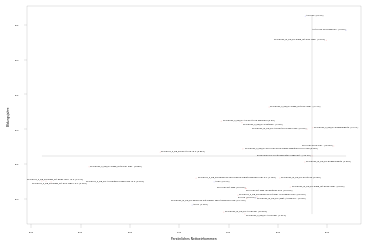

In [45]:
xmean,ymean=t_['inc'][0],t_['edu'][0]
# evtl. Auswahl bestimmer Untergruppen z.B. nach Farbe
t_=t_[t_.col.isin(['red', 'blue'])]
#xmin,xmax,xmean,ymin,ymax,ymean=1000,2750,t_['inc'][0],10,16,t_['edu'][0]
xmin,xmax,ymin,ymax=t_['inc'].min(),t_['inc'].max(),t_['edu'].min(),t_['edu'].max()
plt.close()
plt.figure(figsize = (16.6,11.7), dpi=300, linewidth=0.1) 
#plt.gcf().set_dpi(80)
fig, ax = plt.subplots()
t_.plot('inc','edu', kind='scatter',  ax=ax, c='col', marker='.', s = 0.01)
#plt.ylim(ymin,ymax)
#plt.xlim(xmin,xmax)
plt.xlabel('Persönliches Nettoeinkommen', fontsize=3)
plt.ylabel('Bildungsjahre', fontsize=3)
plt.rc('font', size=2)
plt.rc('xtick', labelsize=2)
plt.rc('ytick', labelsize=2)
plt.rc('lines', markersize=2, linewidth=0.1)
plt.rc('axes', linewidth=0.1)
ax.tick_params(axis='both', which='major', width=0.1)
texts = []
for i, txt in enumerate(t_['text']):
    texts.append(ax.annotate(txt, xy=(t_['inc'][i],t_['edu'][i]), xytext=(t_['inc'][i],t_['edu'][i]+.01),
            horizontalalignment='right',
            verticalalignment='bottom'))
# der folgende adjust-Befehl sorgt für die Reduktion von Überlagerungen, ist aber recht rechenintensiv
adjust_text(texts)
ax.plot([xmin,xmax],[ymean,ymean],color='k')
ax.plot([xmean,xmean],[ymin,ymax],color='k')
try:
  plt.savefig('migr1.pdf')
except:
  print('Die pdf-Datei ist noch geöffnet; der Plot konnte daher nicht gespeichert werden.') 
plt.show()